### Today's Topic: K-means Clustering

### Last week's topic: Decision Tree and Random Forest
- Working and using Decision tree and Random forest
- Decision Tree vs Random forest (single tree vs multiple tree)
- Feature importance during the modelling

**_K-Means Clustering_** main idea: Group similar data points together and discover underlying patterns present.
- The algo looks for a fixed number of clusters in a particular dataset
- The *means* in K-means referes to averaging of the data i.e. finding the centroid

<figure>
    <img
    src="misc/k-means.png">
    <center><figcaption>K-Means</figcaption></center>
</figure>

### Applications of Clustering
1. Image segmentation

2. Customer segmentation

3. Species clustering

4. Anomaly detection

5. Clustering languages

### About the dataset
This dataset has been obtained from UCI ML Repository. https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers.

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/Live.csv')
df.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN


### EDA

In [3]:
df.shape

(7050, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
# dropping the last 4 columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


### Inference:
- 3 categorical columns

- 9 numerical columns

In [8]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


### Exploring categorical columns

In [9]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [10]:
len(df['status_id'].unique())

6997

### Inference:
- Dropping the column as its a unique identifier for each instance i.e. total rows = 7050 but here its 6997

In [11]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [12]:
len(df['status_published'].unique())

6913

### Inference:
- Dropping the column as its a unique identifier for each instance i.e. total rows = 7050 but here its 6913

In [13]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

### Inference
- Will keep this column at the moment 

In [14]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


### Converting categorical to integers

In [16]:
x = df
y = df['status_type']

le = LabelEncoder()
x['status_type'] = le.fit_transform(x['status_type'])
y = le.transform(y)

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [18]:
x.head(2)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0


In [19]:
cols = x.columns

### Feature scaling

In [20]:
min_max = MinMaxScaler()
x = min_max.fit_transform(x)

In [21]:
x = pd.DataFrame(x, columns=[cols])

In [22]:
x.head(2)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.14003,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.00000,0.000000,0.000000,0.000000,0.0


### Modelling with K-Means for 2 clusters

In [24]:
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(x)

KMeans(n_clusters=2, random_state=42)

In [25]:
k_means.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

In [26]:
k_means.inertia_

237.7572640441955

### Inference:
- *Inertia* or *within-cluster sum of squares (WCSS)* : Algorithm clusters data by trying to separate samples in 2 groups (here num_cluster=2) of equal variances which minimises *__inertia__* or *__WCSS__*
- Lower inertia is better and 0 is optimal

### Quality check of weak classification by model

In [31]:
labels = k_means.labels_
correct_labls = sum(y == labels)
print('{} out of {} samples correctly labeled'.format(correct_labls,y.shape[0]))

63 out of 7050 samples correctly labeled


In [36]:
# accuracy check
print('Accuracy: {:.2f}'.format(correct_labls/y.shape[0]))

Accuracy: 0.01


### Inference
- 1% accuracy 

### Using elbow method
- *__Elbow Method__*: Plot the within-cluster sum of squares (WCSS) against different values of 
k. WCSS measures the sum of squared distances between data points and their assigned cluster centers

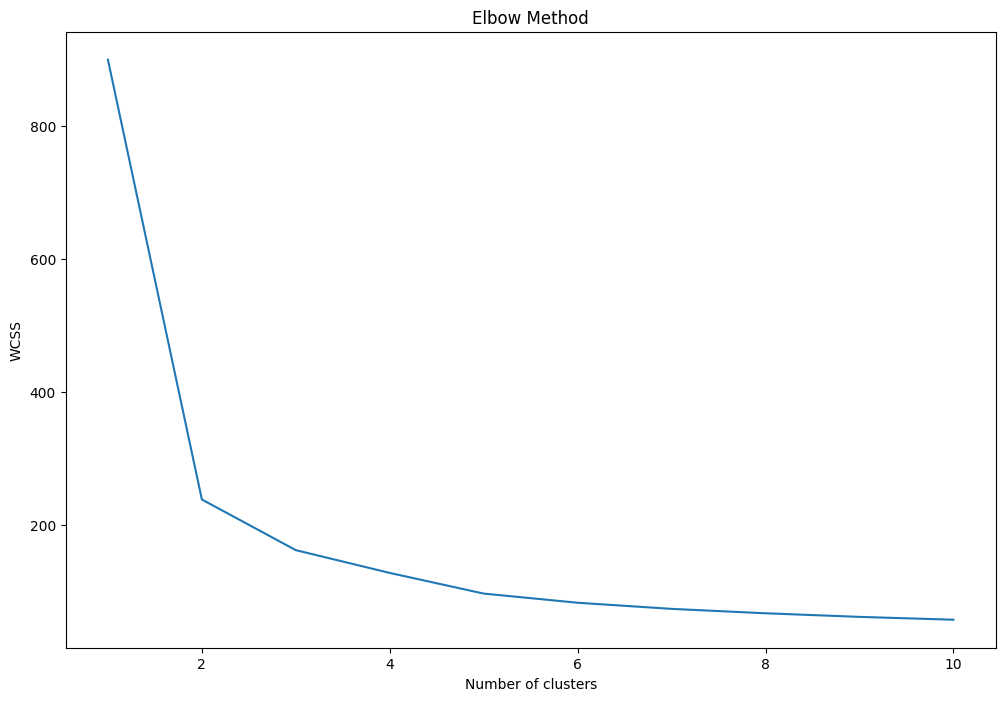

In [40]:
wcss = []
for i in range(1,11):
    k_means_v1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    k_means_v1.fit(x)
    wcss.append(k_means_v1.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Inference
- k=2 could be considered a good number
- trying with other values

In [42]:
# k = 3
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labls = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labls, y.shape[0]))
print('Accuracy score: {0:0.2f}'. format(correct_labls/float(y.shape[0])))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


In [43]:
# k = 4
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labls = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labls, y.shape[0]))
print('Accuracy score: {0:0.2f}'. format(correct_labls/float(y.shape[0])))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


In [44]:
# k = 5
kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labls = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labls, y.shape[0]))
print('Accuracy score: {0:0.2f}'. format(correct_labls/float(y.shape[0])))

Result: 4300 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


### Inference
- Higher accuracy with k = 4

### Next steps
- Perform hyperparameter tuning
